# Algorytmy genetyczne lab2 - cutting stock
## Dawid Przybyliński

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [348]:
class cutting_stock_evolution:
    
    def __init__(self, rectangles, r = 300):
        self.rect = np.asarray(rectangles.split()).reshape(-1,3).astype(int)
        self.rect_num = self.rect.shape[0]
        self.r = r
        self.best = None
        self.generation_mean = []
            
            
    def initialize(self, n, max_failures=50):
        population = []
        for i in range(n):
            # single creature
            creature = []
            keep_trying = True
            while keep_trying:
                rect = self.try_putting_rect(creature, max_failures)
                if rect:
                    creature += rect
                else:
                    keep_trying = False
            population.append(creature)
        self.generation = population
     
    def try_putting_rect(self, creature, max_failures):
        """
        próbuje losowo wstawić nowy prostokąt do genotypu osobnika
        po max_failures nieudanych próbach zwraca None
        """
        for i in range(max_failures):
            [x,y] = np.random.uniform(-self.r, self.r, 2)
            [h,w,v] = evo.rect[np.random.randint(self.rect_num)]
            rect = [x,y,h,w,v]
            overlap_circle = self.rectangle_out_of_circle(rect)
            overlap_rectangle = False
            rect_idx = 0
            while not overlap_rectangle and rect_idx < len(creature):
                overlap_rectangle = self.rectangles_overlap([x,y,h,w], creature[rect_idx:rect_idx+5])
                rect_idx += 5
            if not overlap_circle and not overlap_rectangle:
                return rect
        return None
    
    
    def rectangles_overlap(self, rect1, rect2):
        """
        check whether 2 rectangles overlap, horizontal and vertical separately, then combine 
        """
        v_overlap = not(rect1[1]+rect1[2] < rect2[1] or rect2[1]+rect2[2] < rect1[1])     
        h_overlap = not(rect1[0]+rect1[3] < rect2[0] or rect2[0]+rect2[3] < rect1[0])
        return v_overlap and h_overlap
    
    def rectangle_out_of_circle(self, rect1):
        """
        check whether rectangle is out of circle
        """
        [x,y,h,w] = rect1[0:4]
        return any([x**2+y**2>self.r**2, (x+w)**2+y**2>self.r**2,x**2+(y+h)**2>self.r**2,(x+w)**2+(y+h)**2>self.r**2])
    
    def visualize(self, osobnik):
        plt.figure(figsize=(5, 5), dpi=120)
        x = np.linspace(-self.r, self.r, 1000)
        plt.plot(x, np.sqrt(self.r**2 - x**2), c="black", linewidth=1)
        plt.plot(x, -np.sqrt(self.r**2 - x**2), c="black", linewidth=1)
        idx = 0
        while idx < len(osobnik):
            [x,y,h,w,v] = osobnik[idx:idx+5]
            plt.plot([x,x,x+w,x+w,x],[y,y+h,y+h,y,y], c='blue', linewidth=0.7)
            plt.text(x+w/2-10,y+h/2-10,str(v))
            idx+=5
        plt.show()
    
    
    def evolve(self, epochs = 100, p_cross = 0.7, p_mutate = 0.2):
        """
        główna funkcja przeprowadzająca ewolucję i szukająca minimum
        """
        iteration_counter = 0
        current_best_value = -1
        while True:
            
            # check stop condition 
            if iteration_counter == epochs:
                return self.target(self.best, arguments = True)
            iteration_counter += 1
            
            # crossover
            parents = self.generation[np.random.choice(self.n, int(np.floor(p_cross*self.n)), replace=False), :]
            crossed = self.crossover(parents)
            population = np.vstack((self.generation, crossed))
            pop_size = population.shape[0]
            
            # mutation
            mutated = population[np.random.choice(pop_size, int(np.floor(p_mutate*pop_size)), replace=False), :]
            mutated = self.mutate(mutated)
            population = np.vstack((population, mutated))
            
            # evaluation
            values = np.asarray([self.target(osobnik) for osobnik in population])
            self.generation_mean.append(np.mean(values))
            best_value_index = np.argmax(values)
            if values[best_value_index] > current_best_value:
                self.best = population[best_value_index]
                current_best_value = values[best_value_index]
            
            # selection
            prob = values/values.sum()
            choices = np.random.choice([i for i in range(population.shape[0])], size=self.n, p=prob)
            self.generation = np.asarray([population[choice] for choice in choices])
            
            
            
    def crossover(self,parents):
        """
        krzyżowanie, narazie tylko jednopunktowe
        dla podanych rodziców krzyżujemy 1. z 2., 3. z 4., i tak dalej
        """
        children = []
        for i in range(0, parents.shape[0]-1, 2):
            [child_1, child_2] = self.cross(parents[i], parents[i+1])
            children.append(child_1)
            children.append(child_2)
        return np.asarray(children)
            
            
    def cross(self,x,y):
        """
        krzyżowanie jednopunktowe, punkt podziału jest losowy z przedziału [1,len-1]
        """
        split = random.randint(1,len(x)-1)
        child_1 = np.concatenate((x[0:split], y[split:]))
        child_2 = np.concatenate((y[0:split], x[split:]))
        return [child_1, child_2]
    
    def mutate(self, to_mutate):
        """
        mutacja gaussowska, przesunięcie osobnika o N(0,1)^self.m
        """
        for i, osobnik in enumerate(to_mutate):
            for j, gen in enumerate(osobnik):
                to_mutate[i][j] += np.random.normal(0,1)
        return to_mutate

## Testowanie

In [354]:
evo = cutting_stock_evolution("100 50 2 100 100 3 30 70 1")

In [355]:
evo.rect

array([[100,  50,   2],
       [100, 100,   3],
       [ 30,  70,   1]])

In [356]:
evo.rect_num

3

In [357]:
evo.initialize(5)

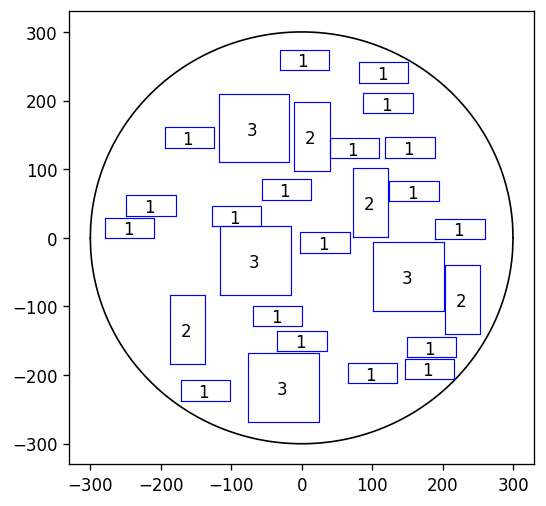

In [358]:
evo.visualize(evo.generation[3])